Nota: texto sin acentos 

En este cuaderno aprenderas como explorar la base de datos [ESMAtlas](https://esmatlas.com/), descargar los resultados, procesarlos y agrupar estructuras de proteinas. 

Puedes encontrar mas recursos didacticos en este [repositorio en GitHub](https://github.com/miangoar/ciencia-de-proteinas-basada-en-IA)



Autor: Miguel Angel Gonzalez Arias (AKA GAMA | @miangoar en [Twitter](https://twitter.com/miangoar) y [Github](https://github.com/miangoar))


# instalacion de librerias

In [1]:
#@markdown Para correr este cuaderno debemos instalar [conda-colab](https://inside-machinelearning.com/en/how-to-install-use-conda-on-google-colab/) para instalar otras librerias. Se reiniciara el entorno de colab, no te preocupes.

#@markdown  Si haces doble click en estas celdas que tienen un boton de play y solo texto, encontraras el codigo que se esta ejecutando, pero que para una mejor visualizacion, lo oculte. 
! pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:41
🔁 Restarting kernel...


In [1]:
#@markdown Instala Foldseek, TMaling, py3Dmol, seqkit, biopython, fasttree, mafft y buddysuite para analizar la informacion de proteinas. 

# instalacion de libs para proteinas
! conda install -y -q -c conda-forge -c bioconda foldseek
! conda install -y -q -c bioconda tmalign
! conda install -y -q -c bioconda fasttree
! conda install -y -q -c bioconda mafft
! conda install -y -q -c bioconda seqkit
! pip install -qqq buddysuite
! pip install -qqq py3Dmol
! pip install -qqq biopython

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - foldseek


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aria2-1.36.0               |       h1e4e653_3         1.8 MB  conda-forge
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    colorama-0.4.6             |     pyhd8ed1ab_0          25 KB  conda-forge
    conda-22.11.1              |   py38h578d9bd_1         905 KB  conda-forge
    foldseek-5.53465f0         | pl5321hf1761c0_0         5.9 MB  bioconda
    gawk-5.1.0                 |       h7f98852_0         1.4 MB  conda-forge
    gettext-0.21.1             |       h27087fc_0         4.1 MB  conda-forge
    libidn2-2.3.4              |       h166bdaf_0         157 KB  conda-forge
    libunistring-0

In [2]:
#@markdown Importa varias las liberiras para proteinas y otras clasicas de python (pd, np, json, os, re, tqdm, subproces, sns, plt)


# manipulacion de datos
from google.colab import files
import pandas as pd 
import numpy as np
import json
import os 
from tqdm import tqdm
import subprocess
import re
from Bio import Phylo

# visualizacion de datos 
import seaborn as sns
import matplotlib.pyplot as plt
import py3Dmol

import warnings
warnings.filterwarnings("ignore")

# Descarga y manipula los datos

Trabajaremos con el cristal de una betalactamasa clase A llamada TEM-1 ([PDB: 1zg4](https://www.rcsb.org/structure/1zg4)), la cual es una enzima responsable de resistencia contra antibioticos y ademas, es un modelo de estudio en evolucion de proteinas.  

Sube tu cristal al webserver de [ESMAtlas](https://esmatlas.com/resources?action=search_structure). En este servicio se usa un sub-conjunto de las ~617 millones de predicciones estructurales, llamado [highquality_clust30](https://github.com/facebookresearch/esm/blob/main/scripts/atlas/README.md) que fue contruido al tomar las secuencias de la base de datos MGnify90 (i.e. la base de datos MGnify clusterizada a 90% de identidad de secuencia) y solo conservando aquellas predicciones confiables (i.e. con valores >0.7 de pTM y pLDDT). En conjunto, estas predicciones estructurales pesan ~1TB de almacenamiento mientras que el dataset completo pesa ~15TB. 

Una vez has cargado tu estructura, ESMAtlas usara Foldseek para encontrar otras estructuras similares. Los resultados de la busqueda pueden tomar un par de minutos y estaran disponibles para descargarse al hacer click en "Download results", el cual los descargara en formato .json. 

Puedes realizar este ejercicio con cualquier otra proteina de la [PDB](https://www.rcsb.org/), pero para fines practicos de este tutorial, es mejor tomar una proteina de tamaño promedio (~300 residuos).

Descarga los resultados y renombra el archivo como "esm_atlas_results" para que podamos trabajar con el en las siguientes celdas.

Para facilitar el proceso, tambien puedes descargar un archivo de ejemplo con los resultados del "blasteo" estructural de la TEM-1 desde el siguiente link:


https://github.com/miangoar/ciencia-de-proteinas-basada-en-IA/blob/main/data/esm_atlas_results.json

Para descargar este u otro archivo desde el repositorio en GitHub, lleva el cursor hasta la pestaña "Raw", da click derecho y selecciona la opcion "Guardar enlace como ..." la cual abrira una ventana donde tendras que asignar un nombre para descargar los datos (Nota: por alguna razon, si descargas el archivo usando el comando de bash "wget my_url . " el archivo no cargara correctamente).

La siguiente imagen muetra un ejemplo de los resultados del blasteo estructural y donde descargar los datos. 



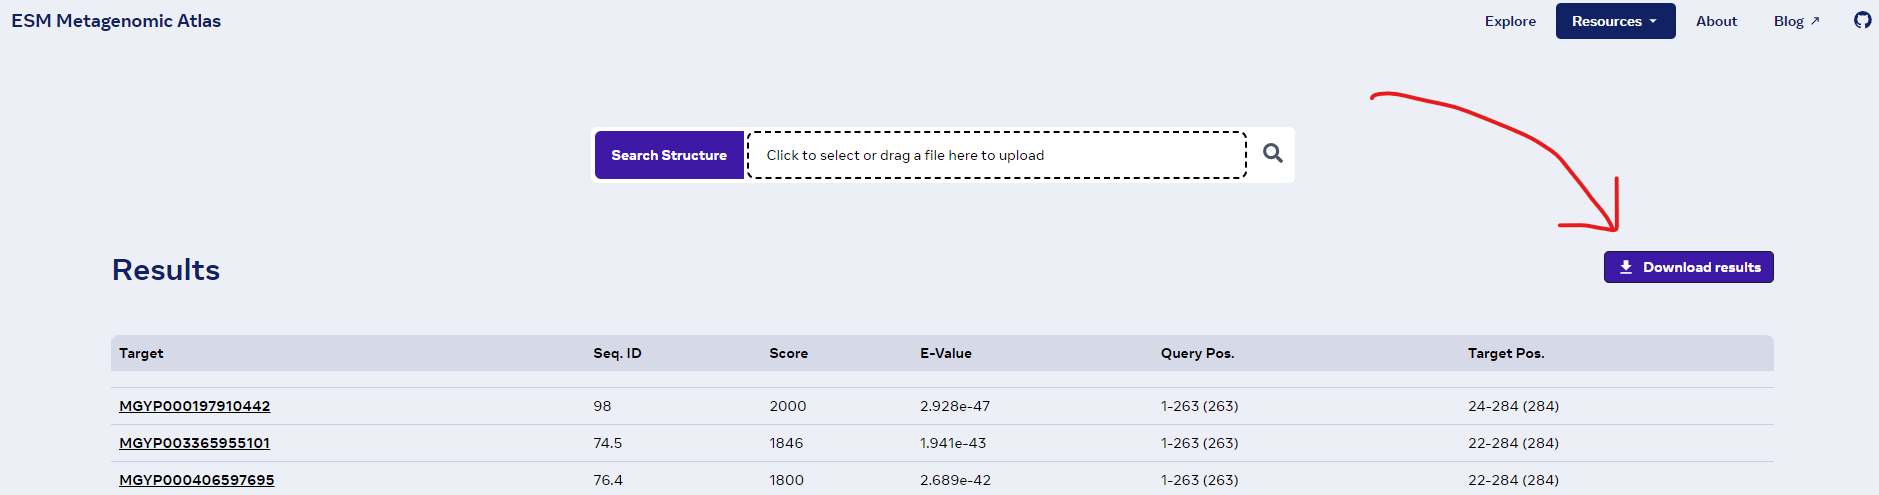


EL archivo .json luce de la siguiente forma: 

```markdown 
[
  {
    "db":"highquality_clust30",
    "alignments":
      [
       {
         "query":"my_PDB.pdb",
         "target":"MGYP000740062793.pdb.gz",
         "seqId":54
         "alnLength":261,
         "missmatches":115,
         "gapsopened":4,
         "qStartPos":2,
         "qEndPos":257,
         "dbStartPos":43,
         "dbEndPos":303,
         "eval":6.804e-37,
         "score":1473,
         "qLen":263,
         "dbLen":307,
         "tSeq":"MNQLII ..."},
       {
         "query":"my_PDB.pdb",
         "target":"MGYP000931547452.pdb.gz",
         "seqId":50.7,
         "alnLength":260,
         "missmatches":122,
         "gapsopened":4,
         "qStartPos":1,
         "qEndPos":257,
         "dbStartPos":26,
         "dbEndPos":282,
         "eval":7.438e-34,
         "score":1359,
         "qLen":263,
         "dbLen":285,
         "tSeq":"MNHALKAPLARIGL ... "},
        {
          N_DICCIONARIOS_CON_DATOS_DISTINTOS}
          .
          .
          .
      ]
  }
]
```



En la parte superior izquierda de la interfaz de google colab, da click en el icono en forma de directorio para subir tus resultados de ESMAtlas en formato json. 

Se expandira la pestaña y apareceran cuatro iconos junto con los datos almacenados en nuestro entorno de colab. Al dejar el cursor sobre cada icono, aparecera una leyenda que explica su funcion. Pulsa el primer icono con un simbolo de documento con un flecha en el centro el cual sirve para cargar archivos al entorno de google colab.  


**<font color='red'>antes de ejecutar la siguiente celda, asegurate de haber cargado tus resultados en formato "esm_atlas_results.json" </font>** 

In [3]:
# abrir y leer los resultados de ESMatlas
with open("esm_atlas_results.json", "r") as f:
    data = json.load(f)

# usa el metodo json_normalize de pandas para leer los datos de la 
# key "alignments" del diccionario completo
df = pd.json_normalize(data, record_path="alignments")
df

,query,target,seqId,alnLength,missmatches,gapsopened,qStartPos,qEndPos,dbStartPos,dbEndPos,eval,score,qLen,dbLen,tSeq
0,job.pdb,MGYP000197910442.pdb.gz,98.0,263,3,1,1,263,24,284,2.928000e-47,2000,263,284,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...
1,job.pdb,MGYP003365955101.pdb.gz,74.5,263,67,0,1,263,22,284,1.941000e-43,1846,263,284,MPRFRLTLISLLAACCLPALANPLTLNKVKEVEKELHARVGYAEIS...
2,job.pdb,MGYP000406597695.pdb.gz,76.4,263,62,0,1,263,22,284,2.689000e-42,1800,263,284,MSRFRLPLLSLLVAFCLPASAHPVTQETVKKAEDQLNARVGYAEVA...
3,job.pdb,MGYP000045266455.pdb.gz,66.5,263,88,0,1,263,58,320,8.288000e-41,1740,263,322,MMKEKRGIVNQQNAGLFLFVASLLAFIGPHSRMYVVMRYIRLCIIS...
4,job.pdb,MGYP000952547975.pdb.gz,63.8,260,94,0,4,263,26,285,1.443000e-39,1690,263,285,MKKIRLIIISLLAGMCTPALSTPVNVTDTIQSTEDHIKGRVGFTEI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,job.pdb,MGYP000270753499.pdb.gz,16.7,167,113,7,20,173,36,189,9.063000e-06,328,263,257,MSQFMYRVLAWITALVVSGGVVRTEAPVGPEISAPSAVLMEASTGQ...
996,job.pdb,MGYP003301483211.pdb.gz,14.3,216,171,9,5,214,2,209,1.016000e-05,326,263,210,SVLSYINANPGERISFRYVNLASNETLGINDLTPIIPAGAYALPAG...
997,job.pdb,MGYP000378968046.pdb.gz,15.7,171,134,3,20,187,37,200,1.431000e-05,320,263,253,MQFLKKFAILLLSFVITVLIVLYFYLYVNGPIIQAKSAILIDAHSG...
998,job.pdb,MGYP001555393514.pdb.gz,14.6,226,167,8,20,234,37,247,2.535000e-05,310,263,248,MQFFVSLFRKSLPVWLLLIAGLITTVAPLRAAHATEAHLLIEADTG...


In [4]:
# en caso de que la celda anterior haya fallado puedes descargar el pandas df que deberia de haberse generado en el siguiente link. 
# https://github.com/miangoar/ciencia-de-proteinas-basada-en-IA/blob/main/data/df_esm_atlas_results.csv

# una vez lo hayas descargado, cargalo a colab y remueve los siguientes 2 comentarios para leerlos como un pandas df 
# df = pd.read_csv("df_esm_atlas_results.csv")
# df

In [5]:
# crea una nueva columna con los nombres de las proteinas sin la extencion .pdb.gz. 
# Esto servira para descargar las estructruas
df["name"] = df.target.str.replace(".pdb.gz", "")

# ordena el df en funcion de la identidad de secuencia
df.sort_values("seqId")

,query,target,seqId,alnLength,missmatches,gapsopened,qStartPos,qEndPos,dbStartPos,dbEndPos,eval,score,qLen,dbLen,tSeq,name
962,job.pdb,MGYP001240559442.pdb.gz,8.1,281,191,13,10,259,27,271,3.490000e-07,385,263,380,MFKEIISLALAAMLTLPCALTSADPGAESAVFAGTKAVAVLESTCL...,MGYP001240559442
988,job.pdb,MGYP002624471280.pdb.gz,9.3,267,184,14,20,262,39,271,2.172000e-06,353,263,384,MNMRRFAALLLCCCMILSLLSMSASASAEGLPELYGVEAALLIDAV...,MGYP002624471280
963,job.pdb,MGYP000645319343.pdb.gz,9.7,278,184,13,13,258,43,285,3.695000e-07,384,263,311,MRKKWISIICAVIIMVCTIITPAYAAGIFLPEESNTKQAESTDLIE...,MGYP000645319343
786,job.pdb,MGYP002516775808.pdb.gz,10.0,290,204,14,3,259,85,350,2.380000e-08,432,263,493,MKQMKRWISAWTLAGVLMCTCLGPGVRTWGSEPVMVAGSGMAEAVW...,MGYP002516775808
619,job.pdb,MGYP000868756329.pdb.gz,10.0,317,208,13,8,263,129,429,1.219000e-09,484,263,429,MIKYLFLTTLLISKIIYAQSNFQVKADFLCSQIIENPNFKYEDYFS...,MGYP000868756329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,job.pdb,MGYP000045266455.pdb.gz,66.5,263,88,0,1,263,58,320,8.288000e-41,1740,263,322,MMKEKRGIVNQQNAGLFLFVASLLAFIGPHSRMYVVMRYIRLCIIS...,MGYP000045266455
1,job.pdb,MGYP003365955101.pdb.gz,74.5,263,67,0,1,263,22,284,1.941000e-43,1846,263,284,MPRFRLTLISLLAACCLPALANPLTLNKVKEVEKELHARVGYAEIS...,MGYP003365955101
2,job.pdb,MGYP000406597695.pdb.gz,76.4,263,62,0,1,263,22,284,2.689000e-42,1800,263,284,MSRFRLPLLSLLVAFCLPASAHPVTQETVKKAEDQLNARVGYAEVA...,MGYP000406597695
148,job.pdb,MGYP000284295739.pdb.gz,82.8,175,30,0,66,240,1,175,8.593000e-23,1014,263,175,LDRRIHYRQSDLVAYSPVTEKHITDGMTVGELCDAAITMSDNTAAN...,MGYP000284295739


Es curioso que el target MGYP001240559442 comparta un 8% de identidad de secuencia con nuestro cristal de referencia. 

Verifica las estructuras. Son homologas? 

Text(0.5, 1.0, 'ESMAtlas | n = 1000')

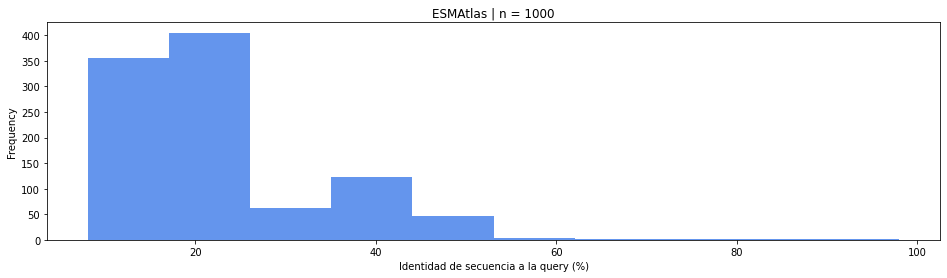

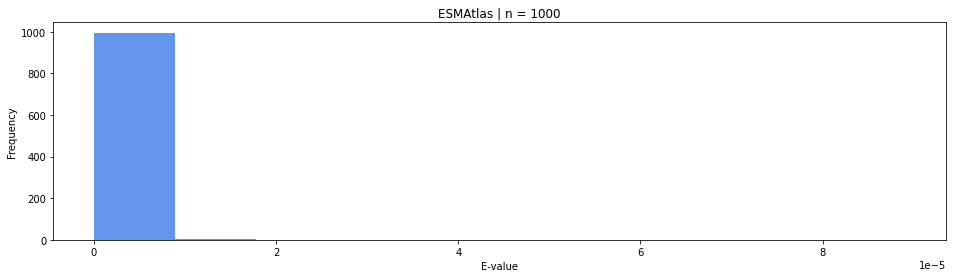

In [8]:
# inspecciona brevemente los datos 

# por porcentaje de identidad de seq
plt.figure(figsize = (16,4))
df.seqId.plot.hist(color = "cornflowerblue")
plt.xlabel("Identidad de secuencia a la query (%)")
plt.title(f"ESMAtlas | n = {len(df)}")

# e-value
plt.figure(figsize = (16,4))
df["eval"].plot.hist(color = "cornflowerblue")
plt.xlabel("E-value")
plt.title(f"ESMAtlas | n = {len(df)}")

In [10]:
# Descargar el cristal de la TEM-1 (PDB: 1zg4) como referencia 
! wget --no-verbose https://files.rcsb.org/view/1zg4.pdb . 

# decarga la prediccion estructural 
! wget -nv https://api.esmatlas.com/fetchPredictedStructure/MGYP001240559442.pdb .

2023-02-13 19:30:54 URL:https://files.rcsb.org/view/1zg4.pdb [209790] -> "1zg4.pdb" [1]
wget: unable to resolve host address ‘.’
FINISHED --2023-02-13 19:30:54--
Total wall clock time: 1.1s
Downloaded: 1 files, 205K in 0.5s (378 KB/s)
2023-02-13 19:30:57 URL:https://api.esmatlas.com/fetchPredictedStructure/MGYP001240559442.pdb [222075/222075] -> "MGYP001240559442.pdb" [1]
wget: unable to resolve host address ‘.’
FINISHED --2023-02-13 19:30:57--
Total wall clock time: 2.8s
Downloaded: 1 files, 217K in 0.6s (386 KB/s)


In [11]:
# usa py3Dmol para ver el cristal directamente de la PDB en forma de ribbon
crystal = py3Dmol.view(query='pdb:1zg4')
crystal.setStyle({'cartoon': {'color':'spectrum', "ribbon": "true"}})
crystal.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
# revisa el MGYP001240559442.pdb en forma de tubes
# lee el archivo local
with open('MGYP001240559442.pdb', 'r') as f:
    pdb = f.read()

# Crea una vista 3D de la proteína
view = py3Dmol.view()
view.addModel(pdb, 'pdb') 
view.setStyle({'cartoon': {'color': 'spectrum', "tubes": "true"}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [13]:
# usa una comparacion de ambas estructuras
# lee ambos pdbs y asignalos a una variable cada uno
with open('MGYP001240559442.pdb', 'r') as f:
    pdb1 = f.read()
with open('1zg4.pdb', 'r') as f:
    pdb2 = f.read()

# genera la visualizacion con grid de 1 fila 2 columnas
view = py3Dmol.view(linked=False, viewergrid=(1,2), width=1200, height=600)

# carga las estructuras en distintos paneles y colorealas para distinguirlas
view.addModel(pdb1,'pdb',viewer=(0,0))
view.setStyle({'cartoon':{'color':'orange'}},viewer=(0,0))

view.addModel(pdb2,'pdb',viewer=(0,1))
view.setStyle({'cartoon':{'color':'green'}},viewer=(0,1))

# despliega las estructuras
view.zoomTo(viewer=(0,0))
view.zoomTo(viewer=(0,1))
view.render()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Parece que una parte de la TEM-1 se encuentra en la estructura de MGYP001240559442, pero esta ultima parece tener una parte mas con betas plegadas y una alfa helice. Posiblemente se trate de una Penicillin binding protein como la que se muestra en este [articulo](https://www.nature.com/articles/nsb0396-284) y que de hecho, son es homologa a la TEM-1. 

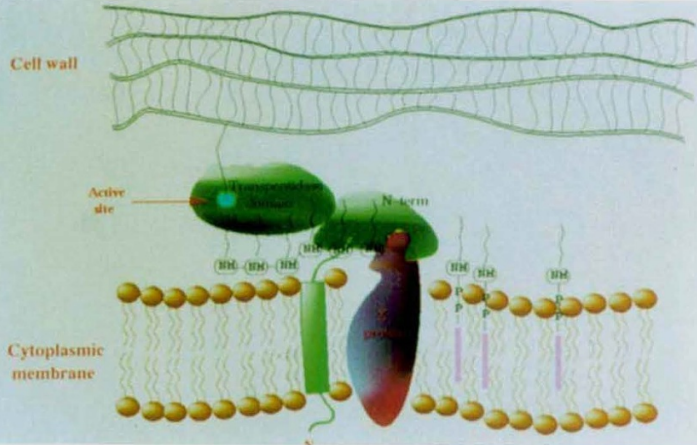

In [14]:
# alinea las  estructuras con tmalign 
! TMalign MGYP001240559442.pdb 1zg4.pdb        


 **************************************************************************
 *                        TM-align (Version 20170708)                     *
 * An algorithm for protein structure alignment and comparison            *
 * Based on statistics:                                                   *
 *       0.0 < TM-score < 0.30, random structural similarity              *
 *       0.5 < TM-score < 1.00, in about the same fold                    *
 * Reference: Y Zhang and J Skolnick, Nucl Acids Res 33, 2302-9 (2005)    *
 * Please email your comments and suggestions to: zhng@umich.edu          *
 **************************************************************************

Name of Chain_1: MGYP001240559442.pdb                              
Name of Chain_2: 1zg4.pdb                                          
Length of Chain_1:  380 residues
Length of Chain_2:  263 residues

Aligned length=  227, RMSD=   3.36, Seq_ID=n_identical/n_aligned= 0.093
TM-score= 0.50429 (if normalized by len

Text(0.5, 1.0, 'muestreo aleatorio | n = 100')

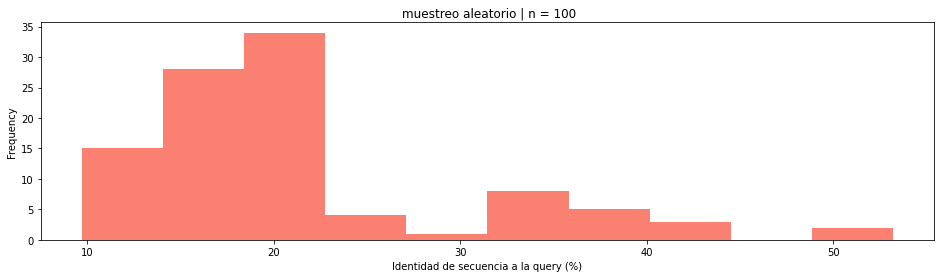

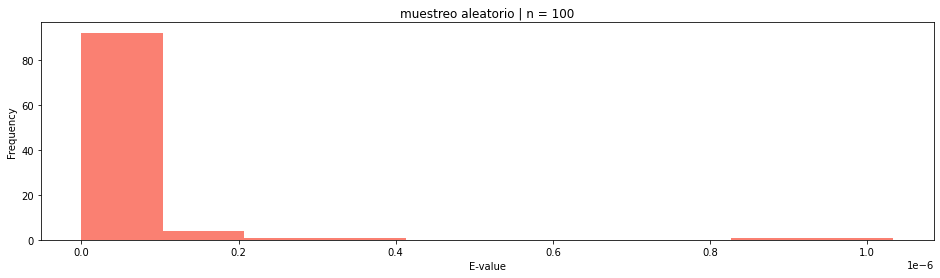

In [15]:
# muetrea al azar 100 estructuras para no trabajar con las 1000
df2 = df.sample(100)

# inspecciona los datos
plt.figure(figsize = (16,4))
df2.seqId.plot.hist(color = "salmon")
plt.xlabel("Identidad de secuencia a la query (%)")
plt.title(f" muestreo aleatorio | n = {len(df2)}")

plt.figure(figsize = (16,4))
df2["eval"].plot.hist(color = "salmon")
plt.xlabel("E-value")
plt.title(f"muestreo aleatorio | n = {len(df2)}")

In [16]:
# crea un directorio donde almacenar los pdbs
! mkdir esm_atlas_proteins

# copia nuestra proteina con baja identidad por si no salio muestreada
! cp MGYP001240559442.pdb esm_atlas_proteins

In [17]:
# crea un log que se imprima mientras se descargan los datos. Usaremos la liberira tqdm
# para que se imprima una barra de progreso de la descarga y nos permita monitorear su avance
# puedes usar emojis en los notebooks para que se vea mas chido usando \N{nombre_del_emoji}
# https://www.quackit.com/character_sets/emoji/emoji_v3.0/unicode_emoji_v3.0_characters_all.cfm 
info = "\N{crab} \N{crab} \N{crab} Descargando proteinas desde el repositorio de ESMAtlas \N{crab} \N{crab} \N{crab} "

# descarga las proteinas iterando sobre la columna "name" del df2
for name in tqdm(df2['name'], desc = info):
    
    # crea la url con la pdb a descargar
    url = f"https://api.esmatlas.com/fetchPredictedStructure/{name}.pdb"
    
    # descarga el pdb
    os.system(f"wget {url} -O esm_atlas_proteins/{name}.pdb")

# verificacion
print("\n numero total de pdbs descargados:")
! ls -1 esm_atlas_proteins | wc -l 

🦀 🦀 🦀 Descargando proteinas desde el repositorio de ESMAtlas 🦀 🦀 🦀 : 100%|██████████| 100/100 [03:38<00:00,  2.18s/it]


 numero total de pdbs descargados:
101


In [18]:
# crea una foldseek DB para alienar las estructuras. foldseek necesita de 
# este paso y crea distintos archivos con varias extenciones basados en 
# el nombre del resultado que le des, en este caso "my_foldseek_db". 
# La opcion "-v 1" es para pedir que no sea tan verboso el resultado
! foldseek createdb esm_atlas_proteins my_foldseek_db -v 1

# realiza el alineamiento contra el cristal de la TEM-1 (PDB: 1zg4) 
! foldseek easy-search 1zg4.pdb my_foldseek_db my_foldseek_results.m8 tmp -v 1

Removing temporary files


In [19]:
# el resultado del comando anterior es el archivo my_foldseek_results.m8, abrelo

# columnas por defecto en el formato .m8 resultante 
column_names = ["query","target","fident","alnlen","mismatch","gapopen","qstart","qend","tstart","tend","evalue","bits"]

# crea un pandas df 
df_foldseek = pd.read_csv("my_foldseek_results.m8", sep = "\t", names=column_names)
df_foldseek.sort_values("fident")

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bits
100,1zg4.pdb,MGYP001240559442.pdb,0.081,250,224,0,10,259,27,271,6.757000e-09,203
98,1zg4.pdb,MGYP000645319343.pdb,0.097,246,219,0,13,258,43,285,7.154000e-09,209
97,1zg4.pdb,MGYP003292564998.pdb,0.110,236,209,0,20,255,33,268,1.785000e-08,215
93,1zg4.pdb,MGYP000880984550.pdb,0.121,243,208,0,20,262,51,288,9.146000e-10,239
87,1zg4.pdb,MGYP000979406348.pdb,0.123,244,206,0,20,263,126,361,8.158000e-10,249
...,...,...,...,...,...,...,...,...,...,...,...,...
12,1zg4.pdb,MGYP000868091888.pdb,0.410,210,123,0,30,239,1,210,3.192000e-22,785
0,1zg4.pdb,MGYP001551392925.pdb,0.421,267,151,0,1,262,31,297,1.167000e-30,1130
40,1zg4.pdb,MGYP001125231575.pdb,0.436,174,98,0,88,261,2,175,3.104000e-17,554
31,1zg4.pdb,MGYP001549929286.pdb,0.500,162,80,0,20,180,9,170,5.496000e-17,585


Foldseek permite elegir que datos presentar como resultados en el [formato final](https://github.com/steineggerlab/foldseek#output-customize-fields-of-tab-seperated-output). Puedes elegir solo aquellos que te sean de interes o no esten incluidos en la salida estandar usando la opcion `--format-output "query,target,qaln,taln ......."`.

En esta ocasion pediremos a FoldSeek que nos incluya los valores de TM-score, la cual es una metrica de similitud estructural usada en proteinas (similar al RMSD) cuyos valores se definen de 0 a 1, siendo un valor de TM-score igual o mayor a 0.5 indicativo de que las estructuras cuentan con un fold similar. Para mas informacion revisa este [articulo](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2913670/)

In [24]:
# blasteo estructural con valores selectos
! foldseek easy-search 1zg4.pdb my_foldseek_db my_foldseek_results_2.m8 tmp --format-output query,target,fident,evalue,bits,tseq,alntmscore,lddt -v 1

Removing temporary files


In [25]:
# columnas selectas
column_names_2 = ["query","target","fident", "evalue", "bits","tseq", "alntmscore" ,"lddt"]

# crea un pandas df y ordenalo por su valor de TM-score
df_foldseek_2 = pd.read_csv("my_foldseek_results_2.m8", sep = "\t", names=column_names_2)
df_foldseek_2.sort_values("alntmscore")

,query,target,fident,evalue,bits,tseq,alntmscore,lddt
100,1zg4.pdb,MGYP001240559442.pdb,0.081,6.757000e-09,203,MFKEIISLALAAMLTLPCALTSADPGAESAVFAGTKAVAVLESTCL...,0.5794,0.4842
98,1zg4.pdb,MGYP000645319343.pdb,0.097,7.154000e-09,209,MRKKWISIICAVIIMVCTIITPAYAAGIFLPEESNTKQAESTDLIE...,0.5882,0.5072
85,1zg4.pdb,MGYP001484248937.pdb,0.162,1.955000e-10,250,MKAFAAVALCALVAWTGLPSTAVLAKEKASEKLVDQVKSAVLMEKD...,0.6204,0.5060
96,1zg4.pdb,MGYP001654935663.pdb,0.130,3.404000e-09,226,MKMHTLIFPPQMFPSLGMLRTQKGGGILMRSKTRLFTTLMAISLML...,0.6297,0.5191
97,1zg4.pdb,MGYP003292564998.pdb,0.110,1.785000e-08,215,MKKIISILIIVLIVFTCDLQINADSNLVKNSKSAILMESLTGEVVF...,0.6428,0.5315
...,...,...,...,...,...,...,...,...
3,1zg4.pdb,MGYP003364971485.pdb,0.389,1.589000e-28,1042,MRRRHFLWGSSALLAAPAIAGTSAPTVISQHENETGGHVGFYAENT...,0.9468,0.8307
40,1zg4.pdb,MGYP001125231575.pdb,0.436,3.104000e-17,554,RVGGDASIDELCAAAMTQSDNVAANLLLRLIGGPSGIGAYARTLGD...,0.9481,0.6239
2,1zg4.pdb,MGYP000617622995.pdb,0.338,1.589000e-28,1057,YLKTNFMKRRHFLKTAVTLPFLSLSVIGCATTKPALSVTYKTNTLL...,0.9499,0.8507
1,1zg4.pdb,MGYP001374713455.pdb,0.395,4.101000e-30,1107,MNNQYASYAMSRRAVILGATGASLAACATAPRGDTELASIESRLDG...,0.9499,0.8398


In [26]:
# revisa el tm-score de nuestra secuencia MGYP001240559442 con 8% de identidad
df_foldseek_2[df_foldseek_2.target == "MGYP001240559442.pdb"]

,query,target,fident,evalue,bits,tseq,alntmscore,lddt
100,1zg4.pdb,MGYP001240559442.pdb,0.081,6.757000e-09,203,MFKEIISLALAAMLTLPCALTSADPGAESAVFAGTKAVAVLESTCL...,0.5794,0.4842


In [41]:
# realiza el mismo blasteo estructural, pero cambia el formato a uno interactivo en html
! foldseek easy-search 1zg4.pdb my_foldseek_db my_foldseek_results.html tmp --format-mode 3 -v 1

Removing temporary files


**descarga y abre el .html. Para ello, da click nuevamente en el icono de directorio y busca el archivo. Busca como se ve la estructura MGYP001240559442**

# Clustering de estructuras

In [42]:
# clusteriza las 101 estructuras. Para ello, tenemos que hacer un blasteo por pares 
! foldseek search my_foldseek_db my_foldseek_db my_foldseek_pairwise_results tmpFolder -c 0.8 -v 1 
! ls  my_foldseek_pairwise_results*

Removing temporary files
my_foldseek_pairwise_results.0	my_foldseek_pairwise_results.dbtype
my_foldseek_pairwise_results.1	my_foldseek_pairwise_results.index


In [43]:
# realiza la clusterizacion propiamente
! foldseek clust my_foldseek_db my_foldseek_pairwise_results my_foldseek_cluster_results -v 1

# da fromato a los resultados para exportarlos en forma de tabla
! foldseek createtsv my_foldseek_db my_foldseek_db my_foldseek_cluster_results my_foldseek_cluster_results.tsv -v 1 
! ls  my_foldseek_cluster_results*

my_foldseek_cluster_results	    my_foldseek_cluster_results.index
my_foldseek_cluster_results.dbtype  my_foldseek_cluster_results.tsv


El [formato del resultado](https://github.com/soedinglab/MMseqs2/wiki#cluster-tsv-format) cuenta con dos columnas:
1. Cluster representativo
2. Miembro del cluster

In [44]:
# lee la tabla como un pandas df y dale formato adecuado
df_clusters =  pd.read_csv("my_foldseek_cluster_results.tsv", sep = "\t", names=["cluster", "member"])
df_clusters.sort_values("cluster")

,cluster,member
0,MGYP000379004870.pdb,MGYP000379004870.pdb
1,MGYP000868091888.pdb,MGYP000868091888.pdb
2,MGYP000868091888.pdb,MGYP003955088925.pdb
3,MGYP001125231575.pdb,MGYP001125231575.pdb
4,MGYP001126274569.pdb,MGYP001126274569.pdb
...,...,...
69,MGYP003366093338.pdb,MGYP001043246463.pdb
70,MGYP003366093338.pdb,MGYP001087083500.pdb
71,MGYP003366093338.pdb,MGYP001099020699.pdb
60,MGYP003366093338.pdb,MGYP000621688696.pdb


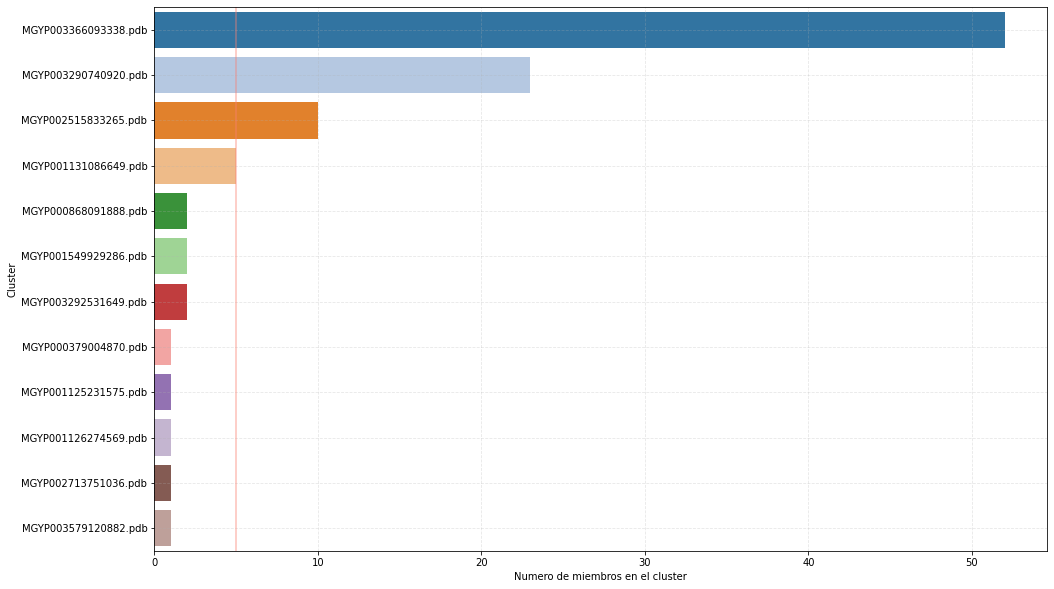

In [45]:
# grafica el df para ver el numero de miembros en cada cluster 
plt.figure(figsize = (16, 10)) 
sns.countplot(data = df_clusters, y = "cluster", order = pd.value_counts(df_clusters.cluster).index, palette="tab20")
plt.ylabel("Cluster")
plt.xlabel("Numero de miembros en el cluster")
plt.grid(alpha = 0.3, linestyle = "--")
# añade una linea de referencia
plt.axvline(x = 5, color = 'salmon', alpha = 0.5)

In [46]:
# crea un nuevo df dando formato en funcion del conteo de miembros
df_clust_counts = df_clusters.value_counts("cluster").to_frame().reset_index()
df_clust_counts = df_clust_counts.rename(columns={0:"count"})
df_clust_counts

,cluster,count
0,MGYP003366093338.pdb,52
1,MGYP003290740920.pdb,23
2,MGYP002515833265.pdb,10
3,MGYP001131086649.pdb,5
4,MGYP000868091888.pdb,2
5,MGYP001549929286.pdb,2
6,MGYP003292531649.pdb,2
7,MGYP000379004870.pdb,1
8,MGYP001125231575.pdb,1
9,MGYP001126274569.pdb,1


In [47]:
# exporta el nombre de los clusters 
df_clust_counts[["cluster"]].to_csv("cluster_names.csv", index = False, sep = "\t", header = False)

! cat cluster_names.csv

MGYP003366093338.pdb
MGYP003290740920.pdb
MGYP002515833265.pdb
MGYP001131086649.pdb
MGYP000868091888.pdb
MGYP001549929286.pdb
MGYP003292531649.pdb
MGYP000379004870.pdb
MGYP001125231575.pdb
MGYP001126274569.pdb
MGYP002713751036.pdb
MGYP003579120882.pdb


In [48]:
# crea un directorio a donde copiar los clusters representativos 
! mkdir cluster_representatives

In [49]:
# copia todos los archivos que se encuentren en la lista 
# al nuevo directorio cluster_representatives

# al usar 2 simbolos de % se declara que todo el siguiente codigo debe ser interpretado en bash 
%%bash

# declara la lista con los nombres a buscar
file="cluster_names.csv"

# declara los dirs de origen y destino
source_dir="esm_atlas_proteins/"
destiny_dir="cluster_representatives/"

# lee la lista con un ciclo while
while read line; do
 
  # checa si la linea tiene registro en el dir con las proteinas
  if [ -f "$source_dir$line" ]; then
    
    #  si tiene registro, copia el archivo
    cp "$source_dir$line" "$destiny_dir"
  
  # fin del ciclo
  fi

done < $file

In [50]:
! ls cluster_representatives

MGYP000379004870.pdb  MGYP001131086649.pdb  MGYP003290740920.pdb
MGYP000868091888.pdb  MGYP001549929286.pdb  MGYP003292531649.pdb
MGYP001125231575.pdb  MGYP002515833265.pdb  MGYP003366093338.pdb
MGYP001126274569.pdb  MGYP002713751036.pdb  MGYP003579120882.pdb


Ahora realizaremos una agrupacion por pares de estructuras con base en sus valores de rmsd, para ello usaremos TMalign. Ojo, no es recomendable correr esta pieza de codigo con muchas estructuras, pues el coste de computo escala al cuadrado.

In [51]:
# declara la ruta al dir con las estructruas y una lista vacia para colectar datos
path = "cluster_representatives"
pdbs = []

# consigue la ruta de cada estructrua
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".pdb"):
            pdbs.append(os.path.join(root, file))

In [52]:
# revisa los datos 
pdbs

['cluster_representatives/MGYP001131086649.pdb',
 'cluster_representatives/MGYP003290740920.pdb',
 'cluster_representatives/MGYP002713751036.pdb',
 'cluster_representatives/MGYP002515833265.pdb',
 'cluster_representatives/MGYP003292531649.pdb',
 'cluster_representatives/MGYP001126274569.pdb',
 'cluster_representatives/MGYP001549929286.pdb',
 'cluster_representatives/MGYP001125231575.pdb',
 'cluster_representatives/MGYP000379004870.pdb',
 'cluster_representatives/MGYP003366093338.pdb',
 'cluster_representatives/MGYP003579120882.pdb',
 'cluster_representatives/MGYP000868091888.pdb']

In [53]:
#  crea un pandas df donde almacenar los datos        
df_rmsd = pd.DataFrame(columns=["file1","file2","len_struct1","len_struct2","aln_len","rmsd","seq_ident"])
df_rmsd

,file1,file2,len_struct1,len_struct2,aln_len,rmsd,seq_ident


In [54]:
# realiza la alineacion por pares de estructruas 

# texto log 
info = "\N{Sauropod} \N{Sauropod} \N{Sauropod} Ejecutando la comparacion por pares de estructructuras \N{Sauropod} \N{Sauropod} \N{Sauropod} "

# pair1
for i in tqdm(range(len(pdbs)), desc = info):
    
    #pair2
    for j in range(len(pdbs)):
        
        # corre TMalign y guarda el output como texto 
        command     = "TMalign {} {}".format(pdbs[i], pdbs[j])
        result_text = subprocess.run(command, shell = True, capture_output = True)
        output_text = result_text.stdout.decode()
        
        # aplica regex para extraer datos del texto
        len1    = re.search("Length of Chain_1 *: *([0-9.]+)", output_text).group(1)
        len2    = re.search("Length of Chain_2 *: *([0-9.]+)", output_text).group(1)
        aln_len = re.search("Aligned length *= *([0-9.]+)", output_text).group(1) 
        rmsd    = re.search("RMSD *= *([0-9.]+)", output_text).group(1)
        ident   = re.search("Seq_ID=n_identical/n_aligned *= *([0-9.]+)", output_text).group(1)
        
        # crea un nuevo df con los atos y concatenalo para tener columnas
        new_row = pd.DataFrame({
            "file1":files[i], "file2":files[j], "len_struct1":len1, "len_struct2":len2, 
            "aln_len":aln_len, "rmsd":rmsd, "seq_ident":ident
        }, index=[0])
        df_rmsd = pd.concat([df_rmsd,new_row], ignore_index=True)

# revisa el pandas df
df_rmsd.head()

🦕 🦕 🦕 Ejecutando la comparacion por pares de estructructuras 🦕 🦕 🦕 : 100%|██████████| 12/12 [00:24<00:00,  2.03s/it]


,file1,file2,len_struct1,len_struct2,aln_len,rmsd,seq_ident
0,MGYP001131086649.pdb,MGYP001131086649.pdb,349,349,349,0.00,1.000
1,MGYP001131086649.pdb,MGYP003290740920.pdb,349,419,232,3.26,0.155
2,MGYP001131086649.pdb,MGYP002713751036.pdb,349,504,243,3.44,0.132
3,MGYP001131086649.pdb,MGYP002515833265.pdb,349,256,210,2.76,0.133
4,MGYP001131086649.pdb,MGYP003292531649.pdb,349,400,240,3.22,0.117


In [55]:
# elimina las extenciones .pdb para mayor claridad
df_rmsd["file1"] = df_rmsd["file1"].str.replace(".pdb", "")
df_rmsd["file2"] = df_rmsd["file2"].str.replace(".pdb", "")
df_rmsd.head()

,file1,file2,len_struct1,len_struct2,aln_len,rmsd,seq_ident
0,MGYP001131086649,MGYP001131086649,349,349,349,0.00,1.000
1,MGYP001131086649,MGYP003290740920,349,419,232,3.26,0.155
2,MGYP001131086649,MGYP002713751036,349,504,243,3.44,0.132
3,MGYP001131086649,MGYP002515833265,349,256,210,2.76,0.133
4,MGYP001131086649,MGYP003292531649,349,400,240,3.22,0.117


In [56]:
# declara una funcion para computar una matriz de similitud usando pd.pivot_table
# con la cual se realizara el clustering con seaborn.clustermap

def do_clustermap(col, title):

  """
  info: una funcion para computar una matriz de similitud y realizar clustering de los datos
  -----------
  input: 
    col = columna con la cual hacer la pivot_talbe
    title = titulo que añadir al grafico resultante
  -----------
  output: grafico sns.clustermap
  """
  
  #  crea la matriz de similitud
  df_sim = df_rmsd.pivot_table(values = col, index = "file1", columns = "file2")

  # plot
  g = sns.clustermap(
        data = df_sim, method = "ward", metric = "euclidean", annot = True, cmap = "Spectral_r",
        xticklabels = True, yticklabels = df_sim.index,
        cbar_kws={"label": title}, cbar_pos = (0.025, 0.75, 0.03,0.2))
  g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize = 8)
  g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_xticklabels(), fontsize = 8) 

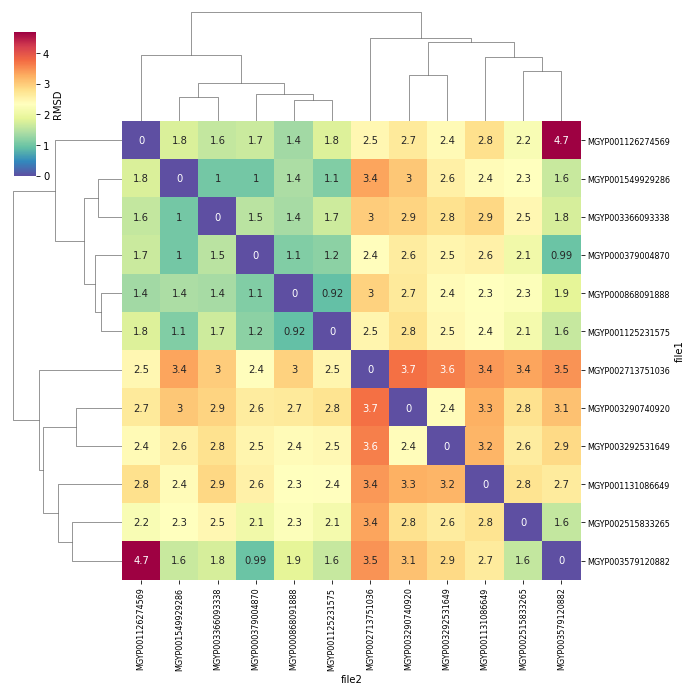

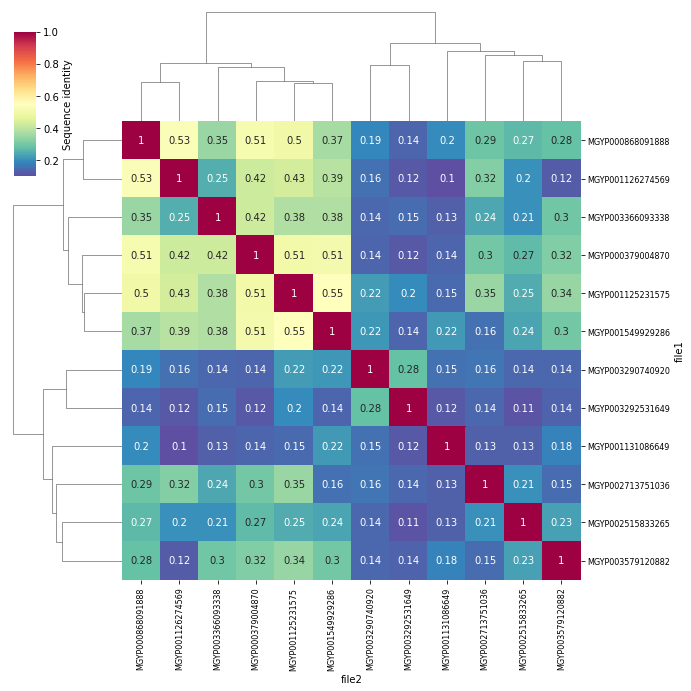

In [57]:
do_clustermap("rmsd", "RMSD")
do_clustermap("seq_ident", "Sequence identity")

Busca los pares de proteinas con menor RMSD o identidad de secuencia y comparalos 

In [58]:
df_rmsd.sort_values("rmsd", ascending = False).head(1)

,file1,file2,len_struct1,len_struct2,aln_len,rmsd,seq_ident
125,MGYP003579120882,MGYP001126274569,181,145,64,4.70,0.125


In [59]:
# usa una comparacion vizual de ambas 
# lee ambos pdbs y asignalos a una variable cada uno

# Modifica el nombre del pdb con el nombre que aparece en la columna file1
with open('esm_atlas_proteins/MGYP003579120882.pdb', 'r') as f:
    pdb1 = f.read()
# Modifica el nombre del pdb con el nombre que aparece en la columna file2
with open('esm_atlas_proteins/MGYP001126274569.pdb', 'r') as f:
    pdb2 = f.read()

# genera la vizualizacion con grid de 1 fila 2 columnas
view = py3Dmol.view(linked=True, viewergrid=(1,2), width=1600, height=800)

# carga las estructruas en distintos paneles y
# colorea las estructrturas para distinguirlas
view.addModel(pdb1,'pdb',viewer=(0,0))
view.setStyle({'cartoon':{'color':'green', "tubes": "true"}},viewer=(0,0))

view.addModel(pdb2,'pdb',viewer=(0,1))
view.setStyle({'cartoon':{'color':'orange', "tubes": "true"}},viewer=(0,1))

# despliega las estructruas
view.zoomTo(viewer=(0,0))
view.zoomTo(viewer=(0,1))
view.render()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

puedes descargar cualquier estructura que te interese y despues alienarlas con programas como pymol, chimeraX o en la siguiente pagina:

https://www.rcsb.org/alignment

Tambien puedes alienarlas en programas como pymol o chimeraX, y colorear las estructruas por valores de pLDDT con los siguientes comandos:

- pymol: `spectrum b, red_yellow_green_cyan_blue, minimum=50, maximum=90`
- chimeraX: `color @@bfactor<100 #0053D6; color @@bfactor<90 #65CBF3; color @@bfactor<70 #FFDB13; color @@bfactor<50 #FF7D45`

# ESMFold para plegar una secuencia

Las predicciones estructurales de ESMAtlas usan un lenguaje de proteinas llamado ESM-2, el cual fue adaptado para predecir la estructura de las proteinas a partir de su secuencia. 

Esta version de ESM-2 se conoce como ESMFold y Meta brinda la opcion de poder usarla faclmente mediante una "API". Adelante se muestra un breve ejemplo de como usar ESMFold

In [61]:
# declara una varaible con la info de tu secuencia de la betalactamasa TEM-1 PDB: 1ZG4
my_seq = 'MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRIDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPVAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW'

# usa la "API" de ESMFold para predecir la estructrua
! curl -X POST --data {my_seq} https://api.esmatlas.com/foldSequence/v1/pdb > my_seq.pdb

curl: /usr/local/lib/libcurl.so.4: no version information available (required by curl)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  176k  100  176k  100   286  15581     24  0:00:11  0:00:11 --:--:-- 38247


In [63]:
# imprime su head y tail 
! head my_seq.pdb && tail my_seq.pdb

HEADER                                            18-OCT-22                     
TITLE     ESMFOLD V1 PREDICTION FOR INPUT
REMARK   1                                                                      
REMARK   1 REFERENCE 1                                                          
REMARK   1  AUTH   ZEMING LIN, HALIL AKIN, ROSHAN RAO, BRIAN HIE, ZHONGKAI ZHU,
REMARK   1  AUTH 2 WENTING LU, NIKITA SMETANIN, ROBERT VERKUIL, ORI KABELI,
REMARK   1  AUTH 3 YANIV SHMUELI, ALLAN DOS SANTOS COSTA,
REMARK   1  AUTH 4 MARYAM FAZEL-ZARANDI, TOM SERCU, SALVATORE CANDIDO,
REMARK   1  AUTH 5 ALEXANDER RIVES
REMARK   1  TITL   EVOLUTIONARY-SCALE PREDICTION OF ATOMIC LEVEL PROTEIN
ATOM   2205  O   TRP A 286      -4.446   5.947 -21.777  1.00  0.68           O  
ATOM   2206  CG  TRP A 286      -3.482   3.737 -17.973  1.00  0.75           C  
ATOM   2207  CD1 TRP A 286      -4.263   2.657 -17.668  1.00  0.68           C  
ATOM   2208  CD2 TRP A 286      -3.131   4.344 -16.726  1.00  0.71           C 

In [64]:
# usa py3Dmol para ver el .pdb 
with open('my_seq.pdb', 'r') as f:
    pdb = f.read()

# Crea una vista 3D de la proteína
view = py3Dmol.view()
view.addModel(pdb, 'pdb')
view.setStyle({'cartoon': {'color': 'spectrum', "tubes": "true"}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Filogenia

Compararemos los resultados del dendograma resultante del clustering por RMDS contra lo que da una filogenia simple. 

In [68]:
# regresemos al subset con solo 100 proteinas muestreadas 
df_clust_counts

,cluster,count
0,MGYP003366093338.pdb,52
1,MGYP003290740920.pdb,23
2,MGYP002515833265.pdb,10
3,MGYP001131086649.pdb,5
4,MGYP000868091888.pdb,2
5,MGYP001549929286.pdb,2
6,MGYP003292531649.pdb,2
7,MGYP000379004870.pdb,1
8,MGYP001125231575.pdb,1
9,MGYP001126274569.pdb,1


In [70]:
# queremos recuperar desde el df2, las secuencias de los clusters en el df df_clust_counts
df2

,query,target,seqId,alnLength,missmatches,gapsopened,qStartPos,qEndPos,dbStartPos,dbEndPos,eval,score,qLen,dbLen,tSeq,name
885,job.pdb,MGYP003579120882.pdb.gz,35.6,146,90,4,1,143,36,180,7.461000e-08,412,263,181,MASLSRRGALAGAAGLLLAGCGETEPVTASRTPPLDTEQLRRAFRE...,MGYP003579120882
380,job.pdb,MGYP002620417990.pdb.gz,20.6,291,182,13,10,261,9,289,1.276000e-15,725,263,296,MPPRALPAPLAAILAEAAGTTAVVAHRLDGTGPRIAHLADRPFALA...,MGYP002620417990
584,job.pdb,MGYP001658153102.pdb.gz,18.6,274,184,14,4,259,160,412,2.365000e-11,553,263,423,MQTSHTRTGNHASRQPNNAGPDFPNNSQADFSTRPQNRPHMVYSRP...,MGYP001658153102
159,job.pdb,MGYP001586662558.pdb.gz,25.4,303,182,7,2,262,35,335,5.895000e-21,940,263,341,MRQRTLWVCWIILFTLLSAGQSLAWAQEKQSPPKSAVVAEIGRIGK...,MGYP001586662558
391,job.pdb,MGYP000535321787.pdb.gz,19.1,277,198,9,7,262,47,318,1.603000e-15,721,263,321,MRRLASLALAIAVSTACTAQAPTTDGAPASAATPAPAAAPPASLQA...,MGYP000535321787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,job.pdb,MGYP000854140699.pdb.gz,14.5,295,212,12,2,261,8,297,2.652000e-11,551,263,307,MEKIELIEQTINKIDTLIKEQLPESKYQFELHDLLTDTKHFRGYDE...,MGYP000854140699
615,job.pdb,MGYP000973474223.pdb.gz,18.3,273,167,17,13,262,30,269,1.027000e-09,487,263,381,MRKKYTIACVMMIIFLLGLVPPALASAELETVKADAYILTDADSGK...,MGYP000973474223
371,job.pdb,MGYP001160389466.pdb.gz,18.2,258,198,9,6,259,4,252,1.015000e-15,729,263,254,MDKILVDSIINKLKNCTGKVGFYYKNLITKEELAYQENESFIAASI...,MGYP001160389466
326,job.pdb,MGYP001826637031.pdb.gz,20.1,263,192,8,2,259,25,274,2.433000e-16,754,263,290,MPGTSPASVATVPVDPELKLGTELTELKQNLQTLADQVPGLTLATF...,MGYP001826637031


In [75]:
# creamos una nueva columna sin la extension .pdb.gz
df_clust_counts["name"] = df_clust_counts["cluster"].str.replace(".pdb", "")
df_clust_counts

,cluster,count,name
0,MGYP003366093338.pdb,52,MGYP003366093338
1,MGYP003290740920.pdb,23,MGYP003290740920
2,MGYP002515833265.pdb,10,MGYP002515833265
3,MGYP001131086649.pdb,5,MGYP001131086649
4,MGYP000868091888.pdb,2,MGYP000868091888
5,MGYP001549929286.pdb,2,MGYP001549929286
6,MGYP003292531649.pdb,2,MGYP003292531649
7,MGYP000379004870.pdb,1,MGYP000379004870
8,MGYP001125231575.pdb,1,MGYP001125231575
9,MGYP001126274569.pdb,1,MGYP001126274569


In [77]:
# seleccionamos los clusters con el metodo isin de pandas
df2_clusters = df2[df2.name.isin(df_clust_counts.name)]
df2_clusters

,query,target,seqId,alnLength,missmatches,gapsopened,qStartPos,qEndPos,dbStartPos,dbEndPos,eval,score,qLen,dbLen,tSeq,name
885,job.pdb,MGYP003579120882.pdb.gz,35.6,146,90,4,1,143,36,180,7.461000e-08,412,263,181,MASLSRRGALAGAAGLLLAGCGETEPVTASRTPPLDTEQLRRAFRE...,MGYP003579120882
552,job.pdb,MGYP002713751036.pdb.gz,18.8,376,175,14,1,262,139,498,1.283000e-12,604,263,504,MNRSIRLVSLFAIILTAILLVNMTVIQAFSEDKYAHNPRNMRGFME...,MGYP002713751036
166,job.pdb,MGYP000868091888.pdb.gz,41.0,212,121,2,30,239,1,210,1.649000e-20,922,263,210,VVKALAQVEMLFAFASTVKALQVGALLRTASDADLDRTVRWTADDL...,MGYP000868091888
777,job.pdb,MGYP001126274569.pdb.gz,35.7,140,86,3,125,262,3,140,2.247000e-08,433,263,145,FQAALRELGDTVTRAERVEPALNQLTPGGTADTSSPRALATDLRAY...,MGYP001126274569
100,job.pdb,MGYP003366093338.pdb.gz,32.2,267,171,5,4,261,30,295,1.901000e-25,1121,263,298,MIDRRDFAFGFGASVILSKCAVARVSQIDPIERLQAIERASGGRLG...,MGYP003366093338
538,job.pdb,MGYP001131086649.pdb.gz,16.9,271,193,12,1,261,80,328,4.858000e-13,621,263,349,MAKKRRKRRKLKKAPRTILLIIILVVLFLILKNSFNNYEETFNSTY...,MGYP001131086649
594,job.pdb,MGYP002515833265.pdb.gz,20.2,227,169,6,47,262,2,227,8.314000e-11,531,263,256,SYKFPQALAALDKMGRRGIPLDSVIPVTKSDLHPNTHSPIRELYPY...,MGYP002515833265
840,job.pdb,MGYP003292531649.pdb.gz,15.0,266,176,15,19,262,23,260,4.724000e-08,420,263,400,MHWLLALFVFFCGGVCFAQDKPVSMILADTESGYLFMRENEKQMMP...,MGYP003292531649
844,job.pdb,MGYP000379004870.pdb.gz,53.2,107,50,0,99,205,2,108,5.002000e-08,419,263,109,MGMTLRTSDNTAANLVLTALGGPKRVTSFLRSIGDTVTRLDRTEPM...,MGYP000379004870
412,job.pdb,MGYP001549929286.pdb.gz,50.0,164,77,4,20,180,9,170,2.839000e-15,711,263,171,EQETQGHIGVAAWDLATDQRVNYREHERFLFCSTFKFPLAGAVLQR...,MGYP001549929286


In [78]:
# exporta los datos de los nombres y sus respectivas secuencias
df2_clusters[["name", "tSeq"]].to_csv("sampled_seqs.csv", index = False, header = False, sep = "\t") 
! cat sampled_seqs.csv

MGYP003579120882	MASLSRRGALAGAAGLLLAGCGETEPVTASRTPPLDTEQLRRAFRELQARARPAVLGLGVTNLESGQIWALRGGRPFPMQSVFKVVLGAYAVGEVEAGRLALDERIVLEDHDLSPYSAIGDAFPVRRNYTARELLLAAVTRSDNTAADVLMKRVQGPGALTAWLDAKGVQGVRDDRYEREI
MGYP002713751036	MNRSIRLVSLFAIILTAILLVNMTVIQAFSEDKYAHNPRNMRGFMEMQTTPRGQIFAGNTVLAQSTQNPDETYSRSYPIDSPAFGNLTGYLSSQFGASELESSQNDILNGTDDSLMKQNWLDALADKPKQGANVEVTIDPALQQAAYDQLVGPGYEGSAVAIQPSTGKILAMASNPGYNPNDLMGDSAEENWANLQEQEGQPLVNHAGAETLPPGSIFKIITTAAGLNNGFDPSSTLTGSNVITLPDTVTELTNYANQKCNGQDAVTLQTAFALSCNTAFVEMSEQLGADELRKYAKAFGVGENYDLGVSTSAGTLGDLPDGAATAQSAIGQRDVTMTALQAAMMSATIANKGKRMEPHVVRQVRNADGKVVHETEPVELNEAVPGDPRDTTSPVAMLKNLQRVVLGDVLQAASRQKLVDWMVANKTGDARLRAGVPRDWRVGDKTGTGERGTYNDIGVFWPPGRKPIVVTVYLTGASAPMDKCNEVIANVARAVANASAGQSG
MGYP000868091888	VVKALAQVEMLFAFASTVKALQVGALLRTASDADLDRTVRWTADDLVTYSPVTEQHVADGLTVRELADAAVRYSDNTAANLLFDELGGPAGLTAELRRIGDTTTTSVREEPDLNTAVPGDPRDTSTPRALARSLASYTLGCVLTPDRRAELVDLLVRNTTGDALVRAGAPDGWTIGDKTGSAAYGTRNDIAVAWPPAGSDRSPVVIAVLT
MGYP001126274569	FQAALRELGDTVTRAERVEPALNQLTPGGTADTS

In [79]:
# convierte el .csv a  un fasta usando seqkit 
! seqkit tab2fx sampled_seqs.csv > sampled_seqs.fasta 

# revisa el numero de secuencias y otras estadisticas
! seqkit stats -a sampled_seqs.fasta 

file                format  type     num_seqs  sum_len  min_len  avg_len  max_len     Q1   Q2     Q3  sum_gap  N50  Q20(%)  Q30(%)  GC(%)
sampled_seqs.fasta  FASTA   Protein        12    3,218      109    268.2      504  173.5  233  374.5        0  349       0       0   8.36


In [81]:
# revisa brevemente el fasta
! head sampled_seqs.fasta

>MGYP003579120882
MASLSRRGALAGAAGLLLAGCGETEPVTASRTPPLDTEQLRRAFRELQARARPAVLGLGV
TNLESGQIWALRGGRPFPMQSVFKVVLGAYAVGEVEAGRLALDERIVLEDHDLSPYSAIG
DAFPVRRNYTARELLLAAVTRSDNTAADVLMKRVQGPGALTAWLDAKGVQGVRDDRYERE
I
>MGYP002713751036
MNRSIRLVSLFAIILTAILLVNMTVIQAFSEDKYAHNPRNMRGFMEMQTTPRGQIFAGNT
VLAQSTQNPDETYSRSYPIDSPAFGNLTGYLSSQFGASELESSQNDILNGTDDSLMKQNW
LDALADKPKQGANVEVTIDPALQQAAYDQLVGPGYEGSAVAIQPSTGKILAMASNPGYNP
NDLMGDSAEENWANLQEQEGQPLVNHAGAETLPPGSIFKIITTAAGLNNGFDPSSTLTGS


In [82]:
# crea un MSA usando mafft 
! alignbuddy sampled_seqs.fasta -q --generate_alignment /usr/local/bin/mafft  > msa_sampled_seqs.fasta

# limpia las regiones con gapps usando la opcion gappyout
! alignbuddy msa_sampled_seqs.fasta -q --trimal gappyout > msa_sampled_seqs_gappyout.fasta 

In [83]:
# convierte los msa en tablas para graficar su ocupancia
%%bash 
for file in msa*fasta; 
  do seqkit fx2tab -H -Q $file > $file.csv; 
done

In [88]:
# declara una funcion para graficar los datos 
def plot_msa(msa):

  """
  info: una funcion graficar la ocupancia de un MSA
  -----------
  input: 
    msa = nombre del msa
  -----------
  output: grafico de ocupancia
  """
    
  # lee la tabla del msa y remplaza los gaps por nans
  name = msa
  df = pd.read_csv(name, sep = "\t", names=["id", "seq"])
  df = df["seq"].apply(lambda x: pd.Series(list(x)))
  df = df.replace("-", np.nan)
    
  # plot 
  plt.figure(figsize=(16,9))
  plt.imshow(df.isna(), aspect = "auto", interpolation = "nearest", cmap = "gray")
  plt.xlabel("MSA position")
  plt.ylabel("seq")
  plt.title(msa, size = 8)
  plt.show()

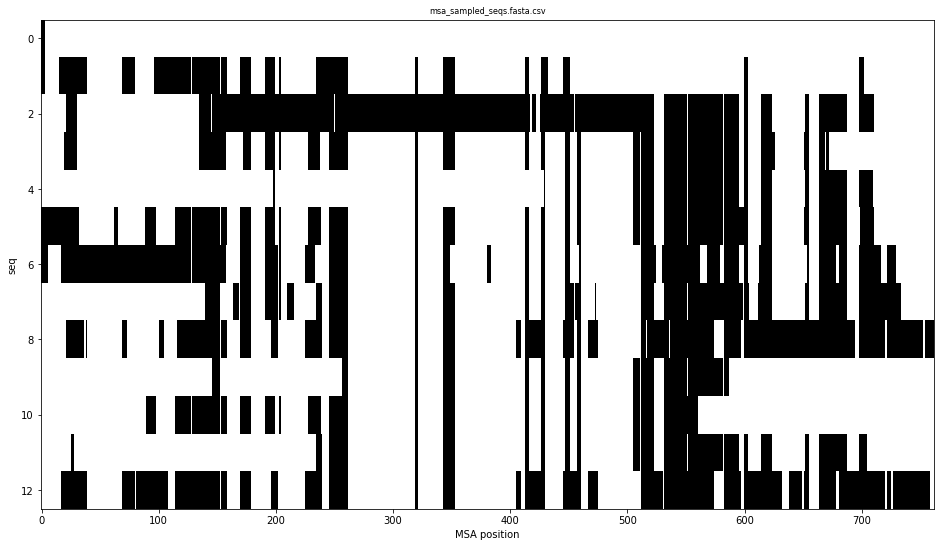

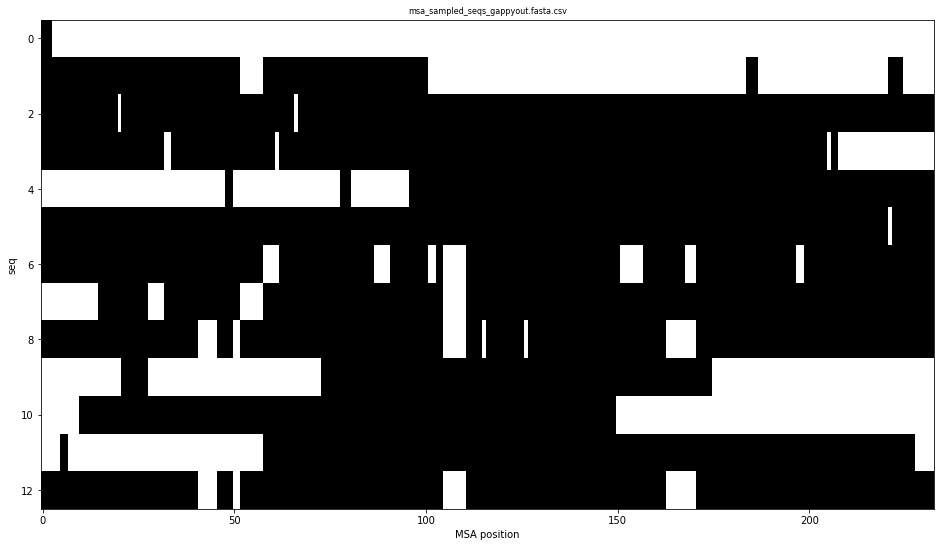

In [89]:
# ejecuta la funcion 
plot_msa("msa_sampled_seqs.fasta.csv")
plot_msa("msa_sampled_seqs_gappyout.fasta.csv")

In [90]:
# crea un arbol filogenetico rapidamente usando fasttree
! fasttree -quiet msa_sampled_seqs_gappyout.fasta > tree_msa_sampled_seqs_gappyout.tree 

In [91]:
# selecciona los 3 clusters con mas miembros
df_clust_counts

,cluster,count,name
0,MGYP003366093338.pdb,52,MGYP003366093338
1,MGYP003290740920.pdb,23,MGYP003290740920
2,MGYP002515833265.pdb,10,MGYP002515833265
3,MGYP001131086649.pdb,5,MGYP001131086649
4,MGYP000868091888.pdb,2,MGYP000868091888
5,MGYP001549929286.pdb,2,MGYP001549929286
6,MGYP003292531649.pdb,2,MGYP003292531649
7,MGYP000379004870.pdb,1,MGYP000379004870
8,MGYP001125231575.pdb,1,MGYP001125231575
9,MGYP001126274569.pdb,1,MGYP001126274569


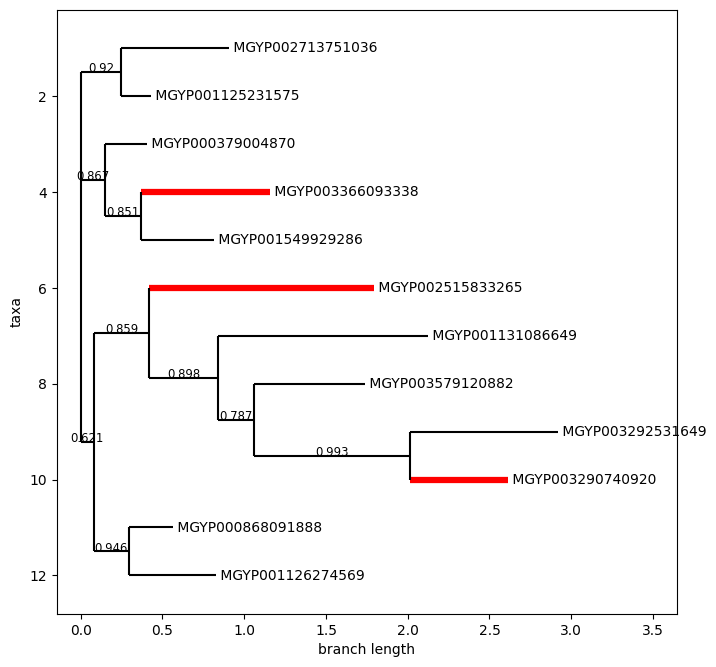

In [97]:
# grafica el arbol filogenetico usando biopython

# declara las dimensiones de la figura
fig = plt.figure(figsize=(8, 8), dpi=100)

# lee el arbol
tree = Phylo.read("tree_msa_sampled_seqs_gappyout.tree", "newick")

# mapea las estructuras que te interesen al asignarles un color 
# puedes tomar el top 3 clusters con mas miembros como ejemplo
colors = {
    "MGYP003366093338": "red",
    "MGYP003290740920": "red",
    "MGYP002515833265": "red",
}

# añade los colores al arbol y modifica el grosor de las ramas
branches = tree.get_terminals()
for branch in branches:
    if branch.name in colors:
      branch.color = colors[branch.name]
      branch.width = 3

# plot
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)
plt.show()

**Fin**